In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_birth = pd.read_csv("daily-total-female-births-CA.csv")

In [3]:
df_birth.head()

,date,births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [4]:
df_birth.describe()

,births
count,365.000000
mean,41.980822
std,7.348257
min,23.000000
25%,37.000000
50%,42.000000
75%,46.000000
max,73.000000


In [5]:
df_birth.isna().sum()

date      0
births    0
dtype: int64

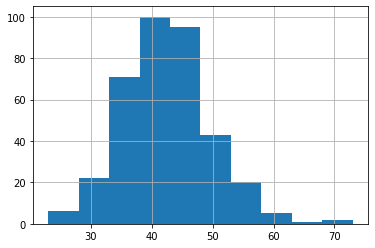

In [6]:
df_birth['births'].hist()
plt.show()

In [7]:
df = pd.read_csv("daily-total-female-births-CA.csv", index_col='date', parse_dates=[0])

In [8]:
df

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44
...,...
1959-12-27,37
1959-12-28,52
1959-12-29,48


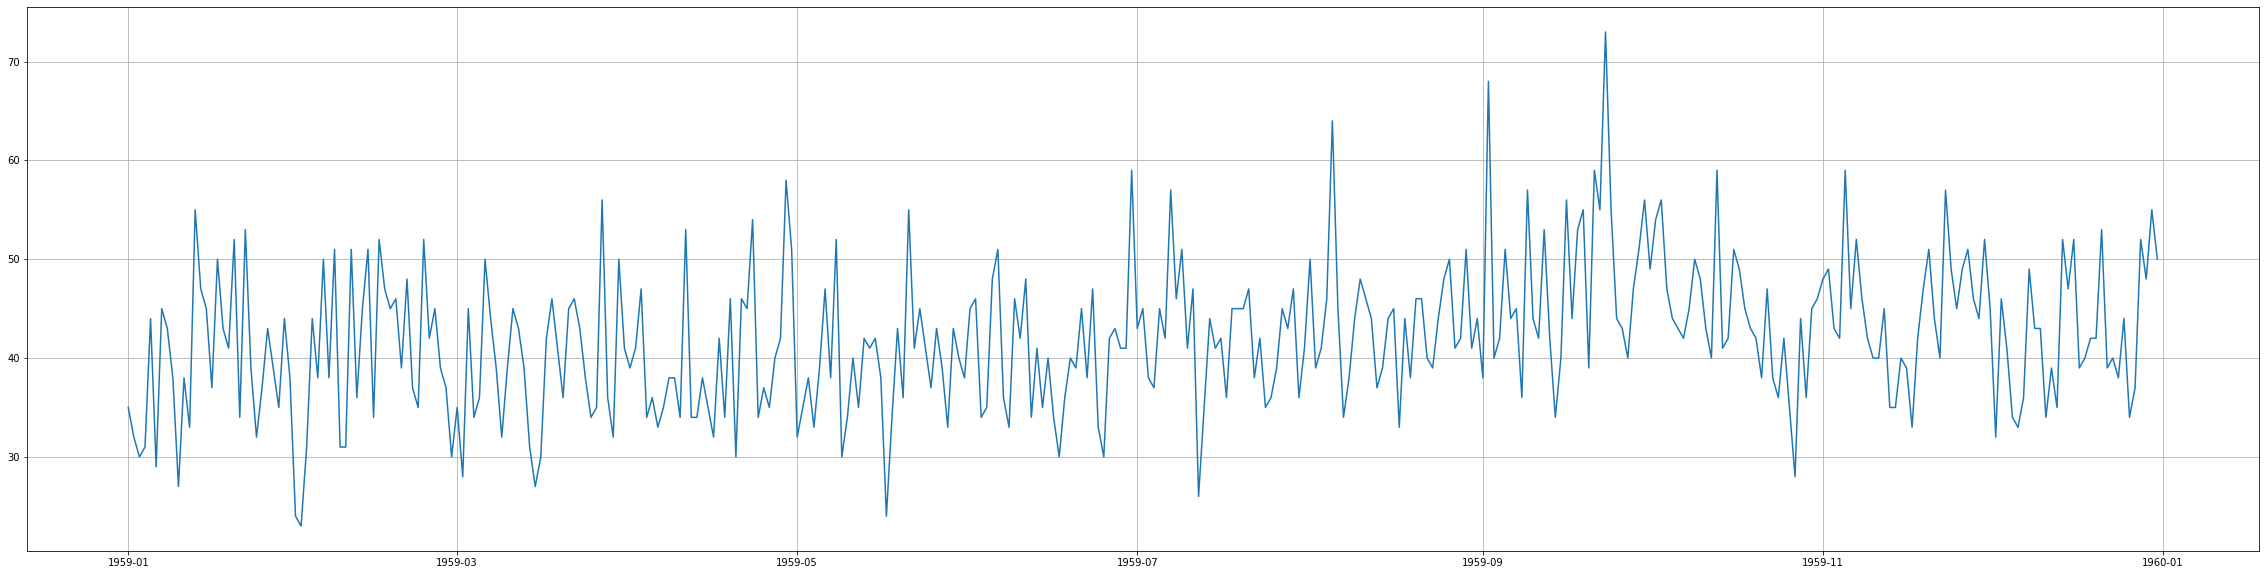

In [9]:
plt.figure(figsize=(40, 10))
plt.plot(df['births'])
plt.grid(True)
plt.show()

In [10]:
df.head()

,births
date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [11]:
series_birth = df.values

In [12]:
series_birth

array([[35],
       [32],
       [30],
       [31],
       [44],
       [29],
       [45],
       [43],
       [38],
       [27],
       [38],
       [33],
       [55],
       [47],
       [45],
       [37],
       [50],
       [43],
       [41],
       [52],
       [34],
       [53],
       [39],
       [32],
       [37],
       [43],
       [39],
       [35],
       [44],
       [38],
       [24],
       [23],
       [31],
       [44],
       [38],
       [50],
       [38],
       [51],
       [31],
       [31],
       [51],
       [36],
       [45],
       [51],
       [34],
       [52],
       [47],
       [45],
       [46],
       [39],
       [48],
       [37],
       [35],
       [52],
       [42],
       [45],
       [39],
       [37],
       [30],
       [35],
       [28],
       [45],
       [34],
       [36],
       [50],
       [44],
       [39],
       [32],
       [39],
       [45],
       [43],
       [39],
       [31],
       [27],
       [30],
       [42],
       [46],

In [13]:
df.size

365

In [14]:
df.tail()

,births
date,
1959-12-27,37
1959-12-28,52
1959-12-29,48
1959-12-30,55
1959-12-31,50


In [15]:
df_mean = df.rolling(window = 10).mean()

In [16]:
df_mean.head(20)

,births
date,
1959-01-01,NaN
1959-01-02,NaN
1959-01-03,NaN
1959-01-04,NaN
1959-01-05,NaN
1959-01-06,NaN
1959-01-07,NaN
1959-01-08,NaN
1959-01-09,NaN


In [17]:
df_mean.duplicated().sum()

236

In [18]:
df_mean.isna().sum()

births    9
dtype: int64

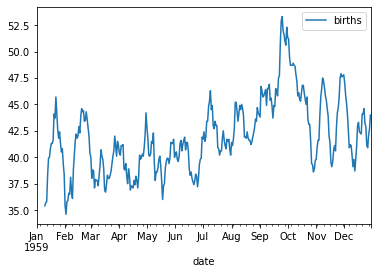

In [19]:
df_mean.plot()
plt.show()

In [20]:
value = pd.DataFrame(series_birth)

In [21]:
value.head()

,0
0,35
1,32
2,30
3,31
4,44


In [22]:
df1 = pd.concat([value, value.shift(1)], axis=1)

In [23]:
df1

,0,0
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
...,...,...
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0


In [24]:
df1.columns = ['actual_birth', 'forecast_birth']

In [25]:
df1

,actual_birth,forecast_birth
0,35,NaN
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
...,...,...
360,37,34.0
361,52,37.0
362,48,52.0
363,55,48.0


In [26]:
df1 = df1[1:]

In [27]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [28]:
birth_error = mean_squared_error(df1['actual_birth'], df1['forecast_birth'])

In [29]:
birth_error

84.22252747252747

In [30]:
df1.head()

,actual_birth,forecast_birth
1,32,35.0
2,30,32.0
3,31,30.0
4,44,31.0
5,29,44.0


In [31]:
np.sqrt(birth_error)

9.177283229394606

In [32]:
df1.describe()

,actual_birth,forecast_birth
count,364.000000,364.000000
mean,42.000000,41.958791
std,7.349219,7.346291
min,23.000000,23.000000
25%,37.000000,37.000000
50%,42.000000,42.000000
75%,46.000000,46.000000
max,73.000000,73.000000


# ARIMA

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

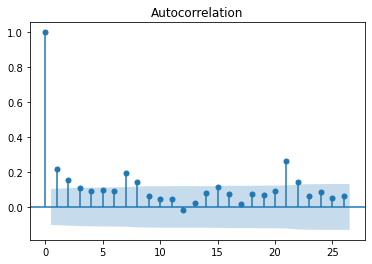

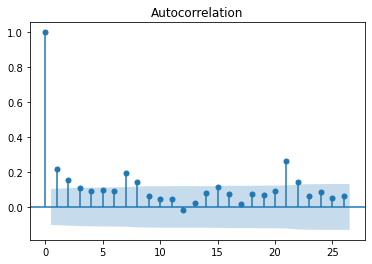

In [34]:
plot_acf(df)

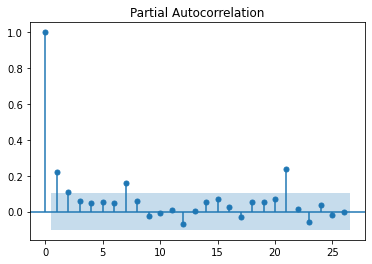

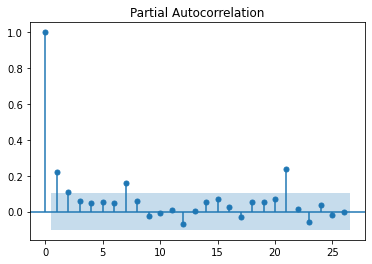

In [35]:
plot_pacf(df)

https://www.youtube.com/watch?v=2v0tkvAAj30